# EDA:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
import xgboost as xgb # type: ignore

In [4]:
app_train = pd.read_csv("./data/application_train.csv")
app_test = pd.read_csv("./data/application_test.csv")
prev_app = pd.read_csv("./data/previous_application.csv")
installments = pd.read_csv("./data/installments_payments.csv")
pos = pd.read_csv("./data/POS_CASH_balance.csv")
bureau = pd.read_csv("./data/bureau.csv")
bureau_bal = pd.read_csv("./data/bureau_balance.csv")
credit_card = pd.read_csv("./data/credit_card_balance.csv")

In [5]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def info (df):
    counter =0
    for col in df:
        missing_perc = (df[col].isnull().sum() / len(df[col])) * 100
        if df[col].isnull().sum() != 0:
            counter +=1
            print(f'Column "{col}" has {missing_perc:.2f}% missing')
    print(f'"{counter}" columns have missing values')
        
info(app_train)

Column "AMT_ANNUITY" has 0.00% missing
Column "AMT_GOODS_PRICE" has 0.09% missing
Column "NAME_TYPE_SUITE" has 0.42% missing
Column "OWN_CAR_AGE" has 65.99% missing
Column "OCCUPATION_TYPE" has 31.35% missing
Column "CNT_FAM_MEMBERS" has 0.00% missing
Column "EXT_SOURCE_1" has 56.38% missing
Column "EXT_SOURCE_2" has 0.21% missing
Column "EXT_SOURCE_3" has 19.83% missing
Column "APARTMENTS_AVG" has 50.75% missing
Column "BASEMENTAREA_AVG" has 58.52% missing
Column "YEARS_BEGINEXPLUATATION_AVG" has 48.78% missing
Column "YEARS_BUILD_AVG" has 66.50% missing
Column "COMMONAREA_AVG" has 69.87% missing
Column "ELEVATORS_AVG" has 53.30% missing
Column "ENTRANCES_AVG" has 50.35% missing
Column "FLOORSMAX_AVG" has 49.76% missing
Column "FLOORSMIN_AVG" has 67.85% missing
Column "LANDAREA_AVG" has 59.38% missing
Column "LIVINGAPARTMENTS_AVG" has 68.35% missing
Column "LIVINGAREA_AVG" has 50.19% missing
Column "NONLIVINGAPARTMENTS_AVG" has 69.43% missing
Column "NONLIVINGAREA_AVG" has 55.18% miss

In [7]:
app_test.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
info(app_test)

Column "AMT_ANNUITY" has 0.05% missing
Column "NAME_TYPE_SUITE" has 1.87% missing
Column "OWN_CAR_AGE" has 66.29% missing
Column "OCCUPATION_TYPE" has 32.01% missing
Column "EXT_SOURCE_1" has 42.12% missing
Column "EXT_SOURCE_2" has 0.02% missing
Column "EXT_SOURCE_3" has 17.78% missing
Column "APARTMENTS_AVG" has 49.01% missing
Column "BASEMENTAREA_AVG" has 56.71% missing
Column "YEARS_BEGINEXPLUATATION_AVG" has 46.89% missing
Column "YEARS_BUILD_AVG" has 65.28% missing
Column "COMMONAREA_AVG" has 68.72% missing
Column "ELEVATORS_AVG" has 51.68% missing
Column "ENTRANCES_AVG" has 48.37% missing
Column "FLOORSMAX_AVG" has 47.84% missing
Column "FLOORSMIN_AVG" has 66.61% missing
Column "LANDAREA_AVG" has 57.96% missing
Column "LIVINGAPARTMENTS_AVG" has 67.25% missing
Column "LIVINGAREA_AVG" has 48.32% missing
Column "NONLIVINGAPARTMENTS_AVG" has 68.41% missing
Column "NONLIVINGAREA_AVG" has 53.51% missing
Column "APARTMENTS_MODE" has 49.01% missing
Column "BASEMENTAREA_MODE" has 56.71% 

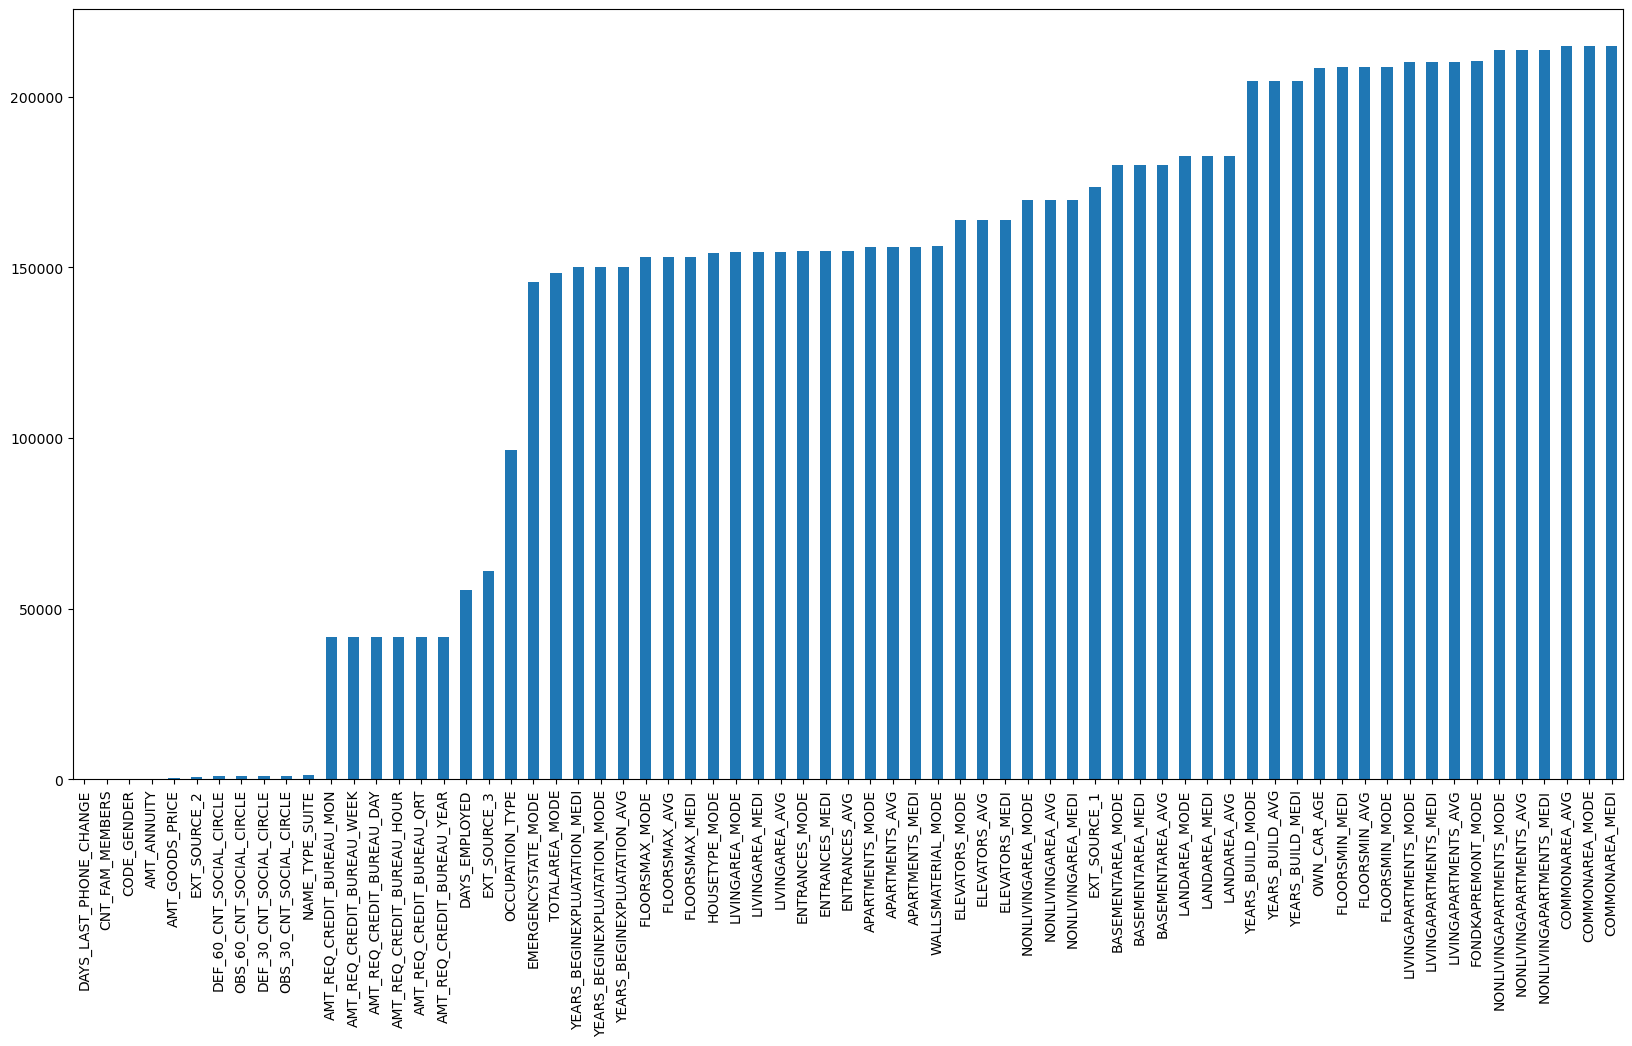

In [123]:
# Plot the nan values in a bar chart width= 20, height = 10
def plot_missing(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar(figsize=(20,10))
    plt.show()
    

plot_missing(app_train)

In [10]:
prev_app.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
app_train["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Data is clearly unbalanced, ratio 11:1. People default about 8% of the time.

In [12]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

we have float64 and int64 that may take unnecessary memory space so let's examine f they need the extra memory space or not.

In [13]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We will convert the float64 an int64 to 32 bit variables to optimize memory

In [14]:
app_train['FLAG_OWN_CAR'] = app_train['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)
app_test['FLAG_OWN_CAR'] = app_test['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)
app_train['FLAG_OWN_REALTY'] = app_train['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)
app_test['FLAG_OWN_REALTY'] = app_test['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].apply(lambda x:np.nan if x == 'XNA' else x)
app_test['CODE_GENDER'] = app_test['CODE_GENDER'].apply(lambda x:np.nan if x == 'XNA' else x)

In [15]:
app_train['FLAG_OWN_REALTY'].dtype

dtype('int64')

In [16]:
float64_columns = app_train.select_dtypes(include=['float64']).columns
app_train[float64_columns] = app_train[float64_columns].astype('float32')

int64_columns = app_train.select_dtypes(include=['int64']).columns
app_train[int64_columns] = app_train[int64_columns].astype('int32')

float64_columns = app_test.select_dtypes(include=['float64']).columns
app_test[float64_columns] = app_test[float64_columns].astype('float32')

int64_columns = app_test.select_dtypes(include=['int64']).columns
app_test[int64_columns] = app_test[int64_columns].astype('int32')

In [17]:
# apply label encoding to categorical columns with 2 unique values and one-hot encoding to columns with more than 2 unique values
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**EDA

let's look at our data

In [18]:
def pie_maker(df,column):
    plt.figure(figsize=(6,6))
    plt.pie(df[column].value_counts(), labels =None ,\
           autopct='%1.1f%%', colors = sns.color_palette('colorblind'))
    plt.legend(df[column].value_counts().index, title=column, loc='center left', bbox_to_anchor=(1, 0.5))


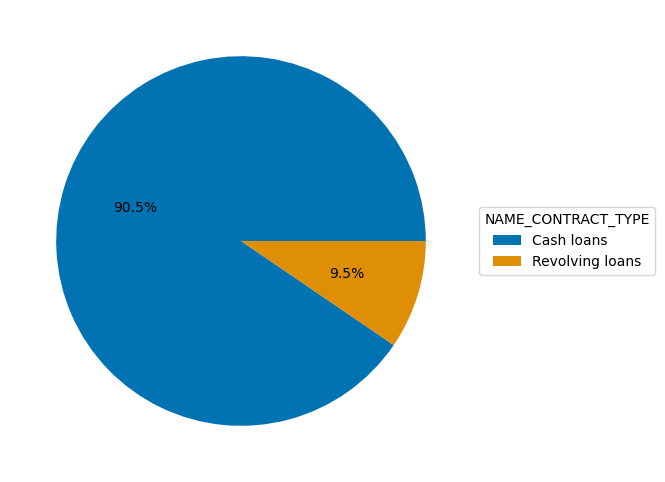

In [19]:
pie_maker(app_train,'NAME_CONTRACT_TYPE')

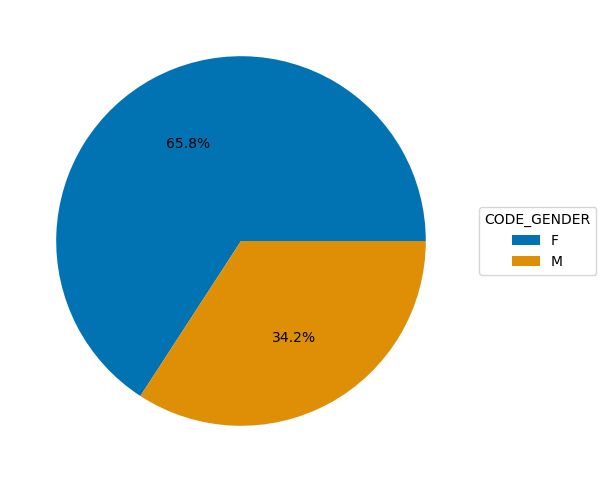

In [20]:
pie_maker(app_train,'CODE_GENDER')

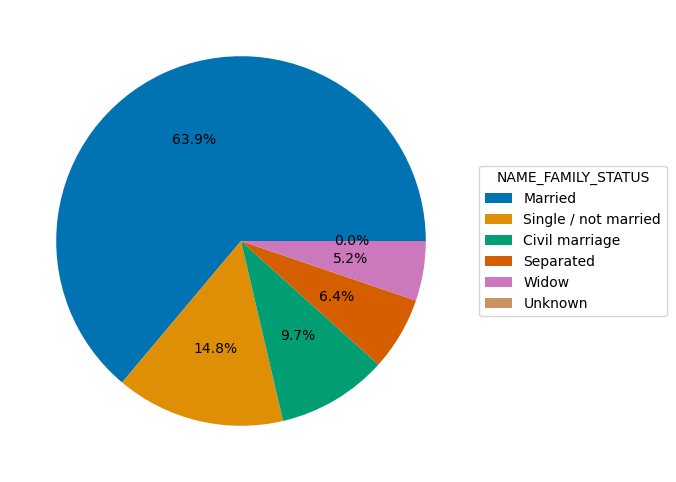

In [21]:
pie_maker(app_train,'NAME_FAMILY_STATUS')

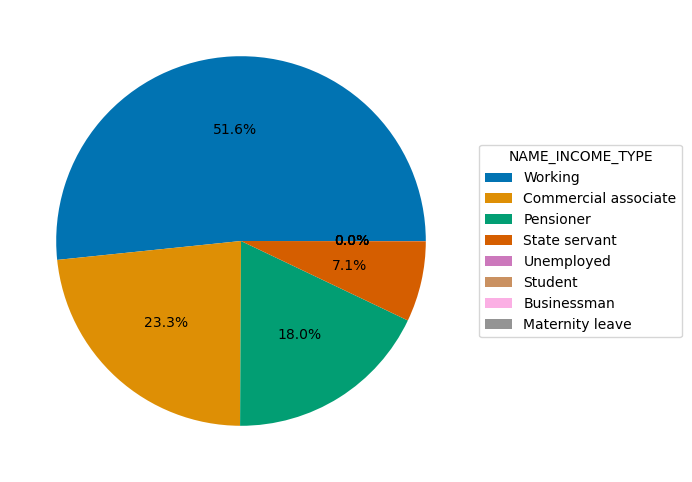

In [22]:
pie_maker(app_train,'NAME_INCOME_TYPE')

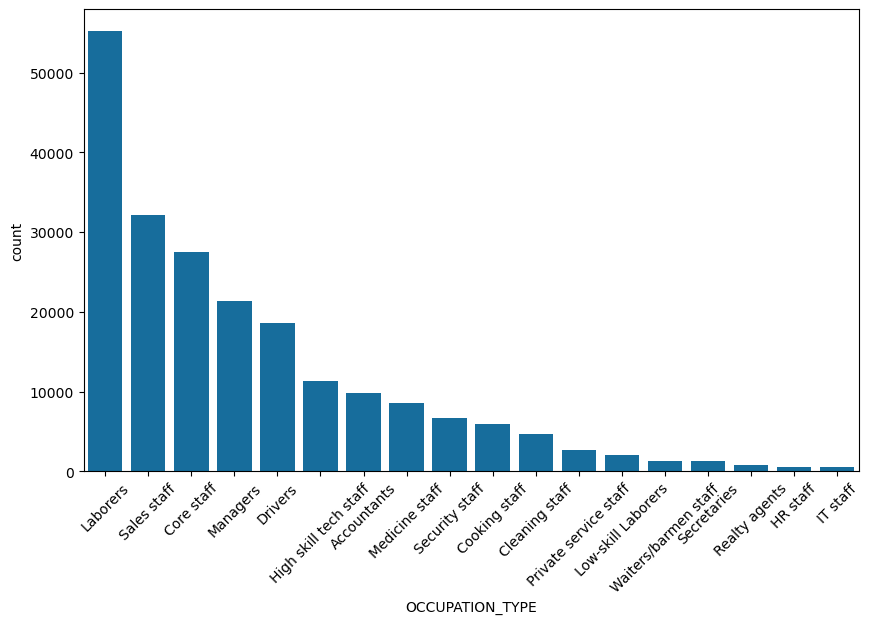

In [23]:
def bar_maker(df,column):
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df, x=df[column],\
          palette=[sns.color_palette("colorblind")[0]],order=df[column].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

bar_maker(app_train,'OCCUPATION_TYPE')

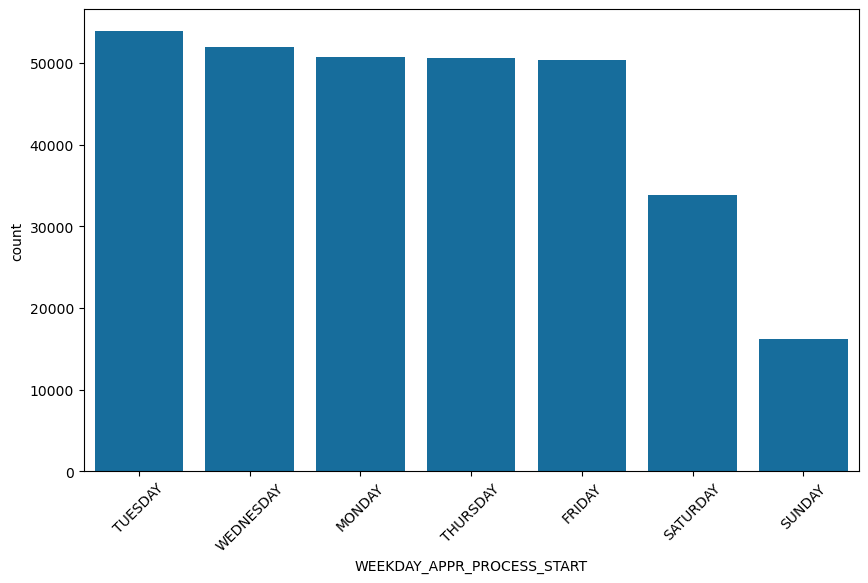

In [24]:
bar_maker(app_train,"WEEKDAY_APPR_PROCESS_START")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

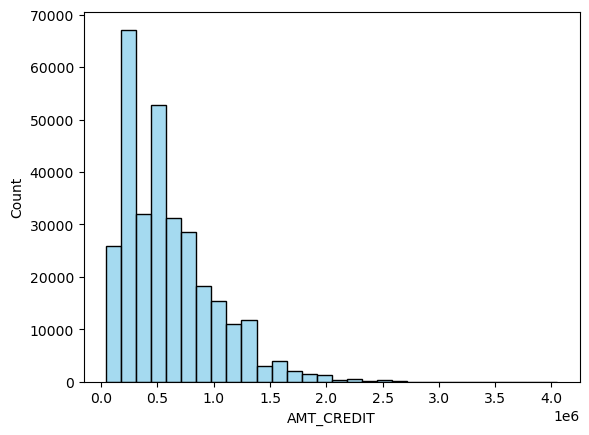

In [25]:
sns.histplot((app_train["AMT_CREDIT"]), color="skyblue", bins=30)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

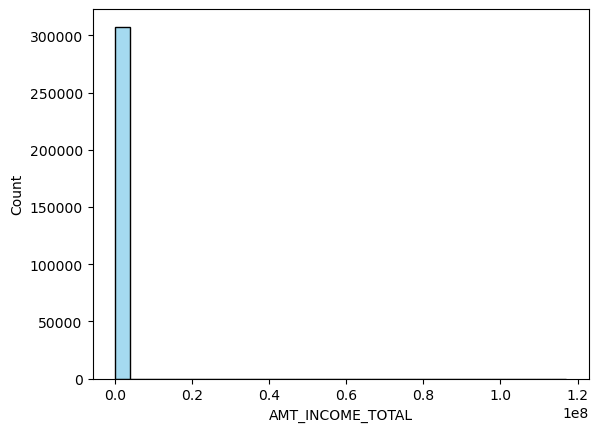

In [26]:
sns.histplot((app_train["AMT_INCOME_TOTAL"]), color="skyblue", bins=30)

We can take the log of the income amounts to have a better data distribution as apparently we have skewed data.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

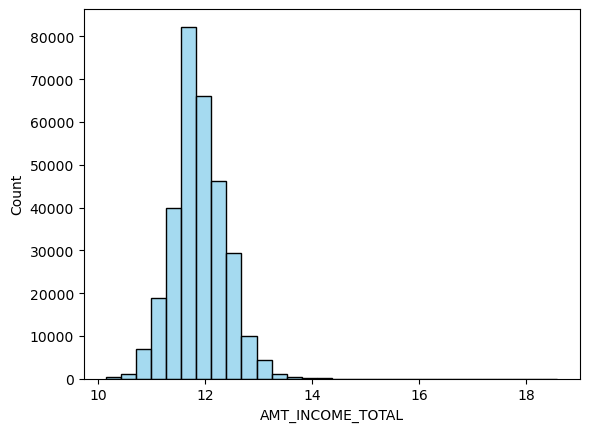

In [27]:
sns.histplot(np.log1p(app_train["AMT_INCOME_TOTAL"]), color="skyblue", bins=30)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

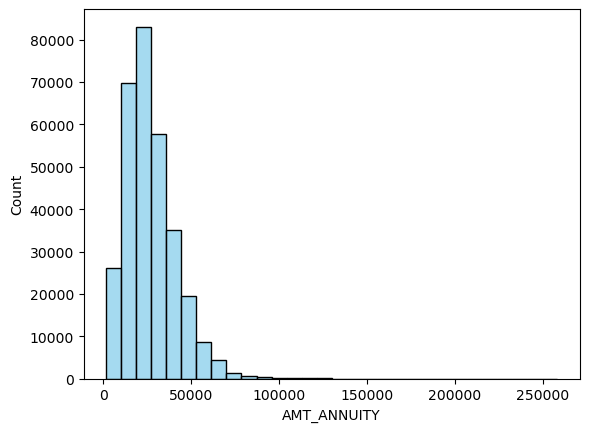

In [28]:
sns.histplot(app_train["AMT_ANNUITY"], color="skyblue", bins=30)

# Feature engineering

<BarContainer object of 2 artists>

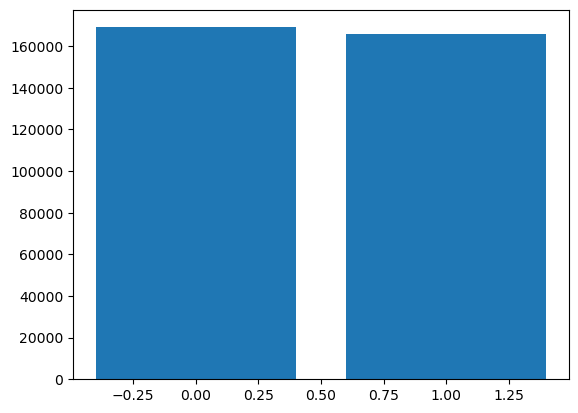

In [29]:
grouped = app_train.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()
plt.bar(grouped.index, grouped.values)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

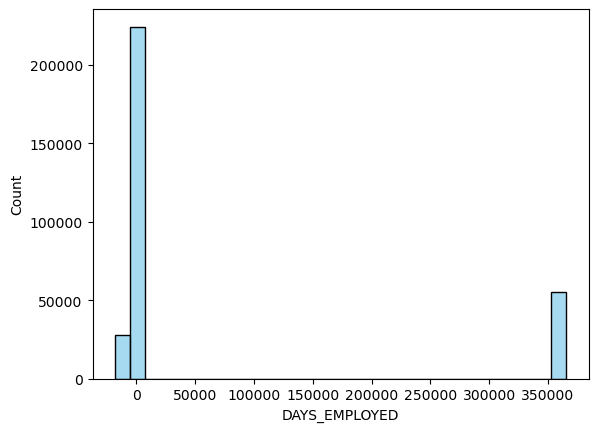

In [30]:
sns.histplot(app_train["DAYS_EMPLOYED"], color="skyblue", bins=30)

There's something weird in the days employed. Appears there is data that is out of context. Let's check it out.

In [31]:
r = app_train.query('DAYS_EMPLOYED > 350000')

In [32]:
#we will impute these values with nans
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 350000 else x)
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 350000 else x)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

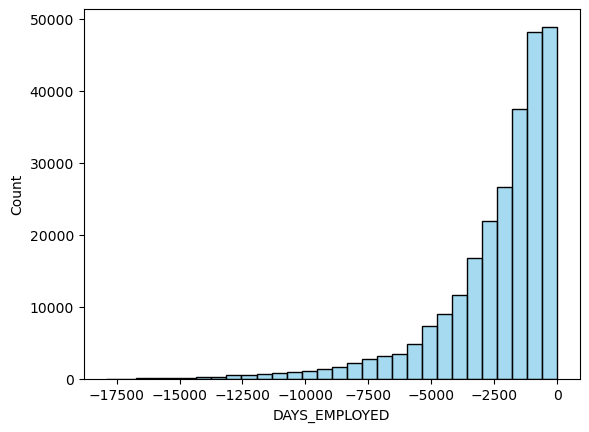

In [33]:
sns.histplot(app_train["DAYS_EMPLOYED"], color="skyblue", bins=30)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='OWN_CAR_AGE', ylabel='Count'>

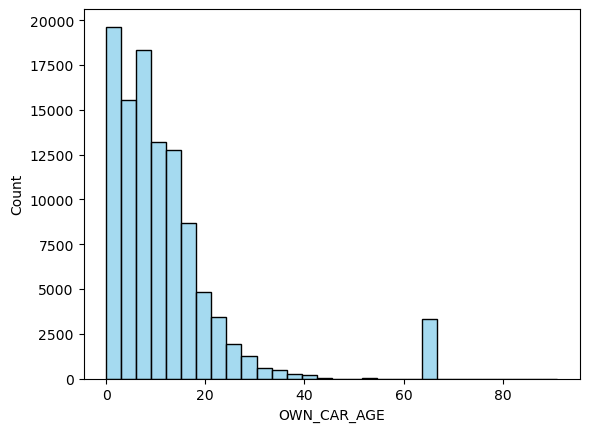

In [34]:
sns.histplot(app_train["OWN_CAR_AGE"], color="skyblue", bins=30)

In [35]:
app_train.query('OWN_CAR_AGE > 60')['OWN_CAR_AGE'].value_counts()

OWN_CAR_AGE
64.0    2443
65.0     891
63.0       2
91.0       2
69.0       1
Name: count, dtype: int64

There's an unusual spike in the cars having age 64 and 65 years. We will have a look at these entries and set them to nans if there's nothing interesting.

In [36]:
app_train.query('OWN_CAR_AGE > 60')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
85,100100,0,Cash loans,M,1,1,2,202500.0,796396.5,38443.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
134,100156,0,Cash loans,F,1,0,2,157500.0,945000.0,39127.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
237,100275,0,Cash loans,F,1,1,0,108000.0,646920.0,18670.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
272,100315,0,Cash loans,F,1,1,1,121500.0,288873.0,21064.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
369,100425,0,Cash loans,F,1,1,2,90000.0,688500.0,20259.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306946,455618,1,Cash loans,M,1,1,0,126000.0,143910.0,15628.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307029,455713,0,Cash loans,F,1,0,2,153000.0,808650.0,26217.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307076,455766,0,Revolving loans,F,1,1,0,112500.0,315000.0,15750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307132,455828,0,Cash loans,M,1,1,0,112500.0,323194.5,16632.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [37]:
app_train['OWN_CAR_AGE'] = app_train['OWN_CAR_AGE'].apply(lambda x: np.nan if x == 64 or x == 65 else x)
app_test['OWN_CAR_AGE'] = app_test['OWN_CAR_AGE'].apply(lambda x: np.nan if x == 64 or x == 65 else x)

<BarContainer object of 2 artists>

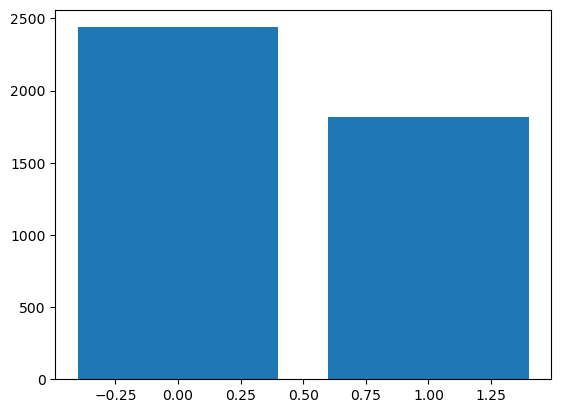

In [38]:
grouped = app_train.groupby('TARGET')['DAYS_EMPLOYED'].mean() *-1
plt.bar(grouped.index, grouped.values)

We can see that customers who default tend to have a mean value of years of employment less than 5 years. While those who don't have a higher value of approx. 6.8 years

<BarContainer object of 2 artists>

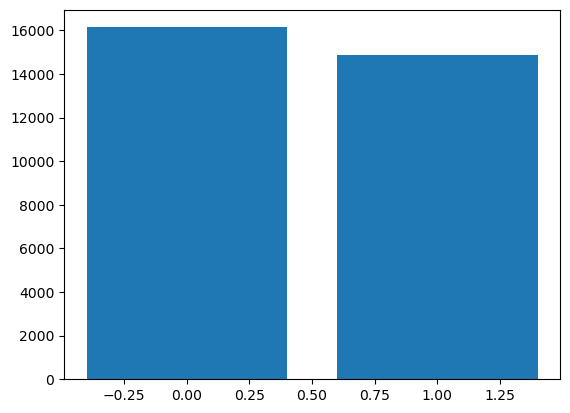

In [39]:
grouped = app_train.groupby('TARGET')['DAYS_BIRTH'].mean() *-1
plt.bar(grouped.index, grouped.values)

<BarContainer object of 2 artists>

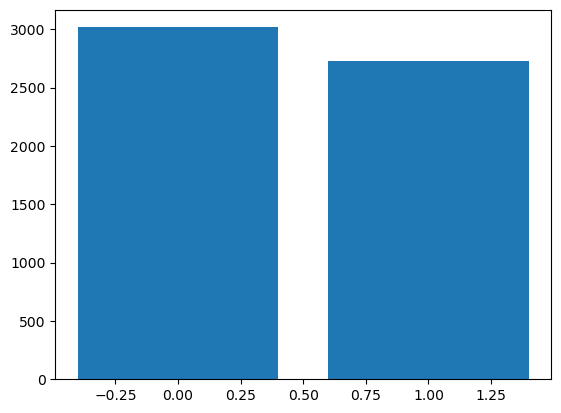

In [40]:
grouped = app_train.groupby('TARGET')['DAYS_ID_PUBLISH'].mean() *-1
plt.bar(grouped.index, grouped.values)

<BarContainer object of 2 artists>

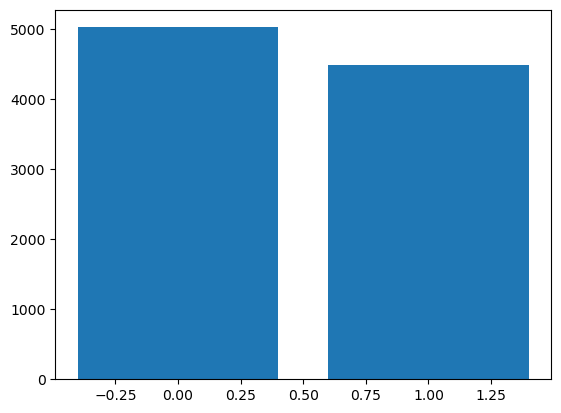

In [41]:
grouped = app_train.groupby('TARGET')['DAYS_REGISTRATION'].mean() *-1
plt.bar(grouped.index, grouped.values)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='DAYS_BIRTH', ylabel='Count'>

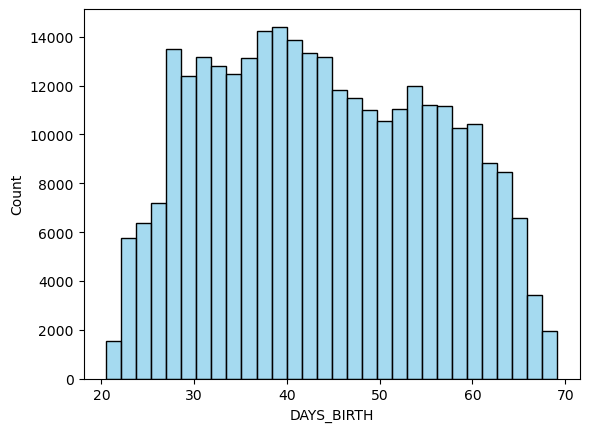

In [42]:
sns.histplot(app_train["DAYS_BIRTH"]/-365, color="skyblue", bins=30)

In [43]:
bin_edges = [0,21,26,36,46,56,66,100]

# Define the labels for the bins
bin_labels = ['0-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create a new column with the age bins
app_train['AGE'] = pd.cut(app_train['DAYS_BIRTH']/-365, bins=bin_edges, labels=bin_labels)
app_test['AGE'] = pd.cut(app_test['DAYS_BIRTH']/-365, bins=bin_edges, labels=bin_labels)

/var/folders/lh/gq52fc897bz_4kb22zd34wch0000gp/T/ipykernel_52389/2600932612.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/lh/gq52fc897bz_4kb22zd34wch0000gp/T/ipykernel_52389/2600932612.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [44]:
def cat_vs_target(df, column):
    
    temp = df.groupby(column)["TARGET"].value_counts(normalize=True).unstack().fillna(0) * 100

# Sort by the highest percentage of 'NO'
    temp = temp.sort_values(by=1, ascending=False)

    # Create a bar plo
    fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size
    temp.plot(kind='bar', stacked=False, colormap='Set2', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.get_legend().remove()


    # Set labels and title
    plt.title('Most Defaulting by ' + column)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height), ha='center')

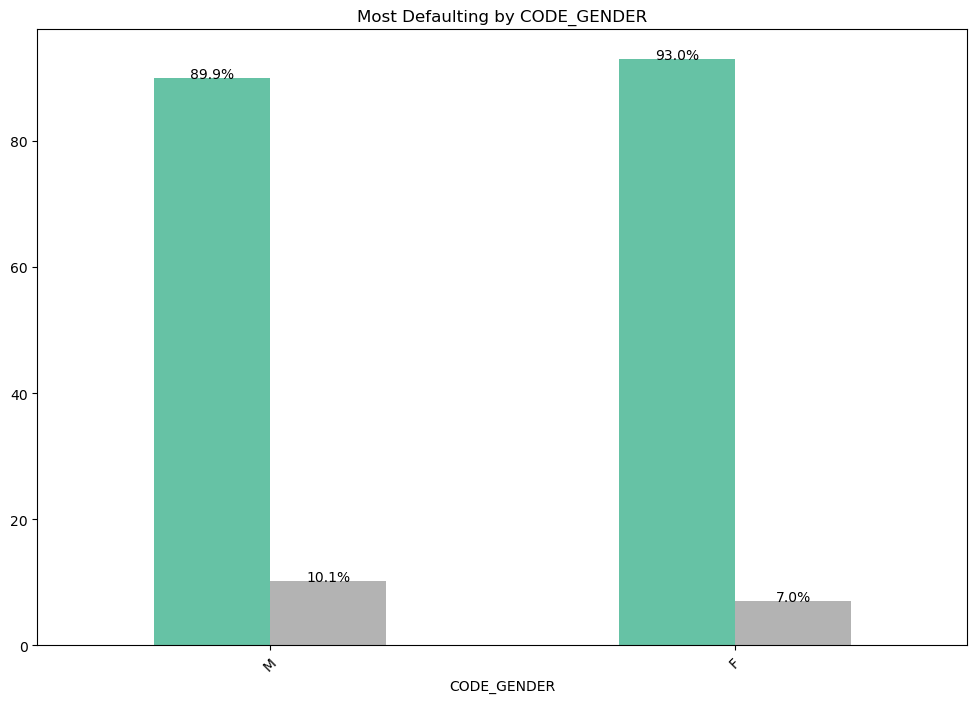

In [45]:
cat_vs_target(app_train, 'CODE_GENDER')

/var/folders/lh/gq52fc897bz_4kb22zd34wch0000gp/T/ipykernel_52389/2185684332.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



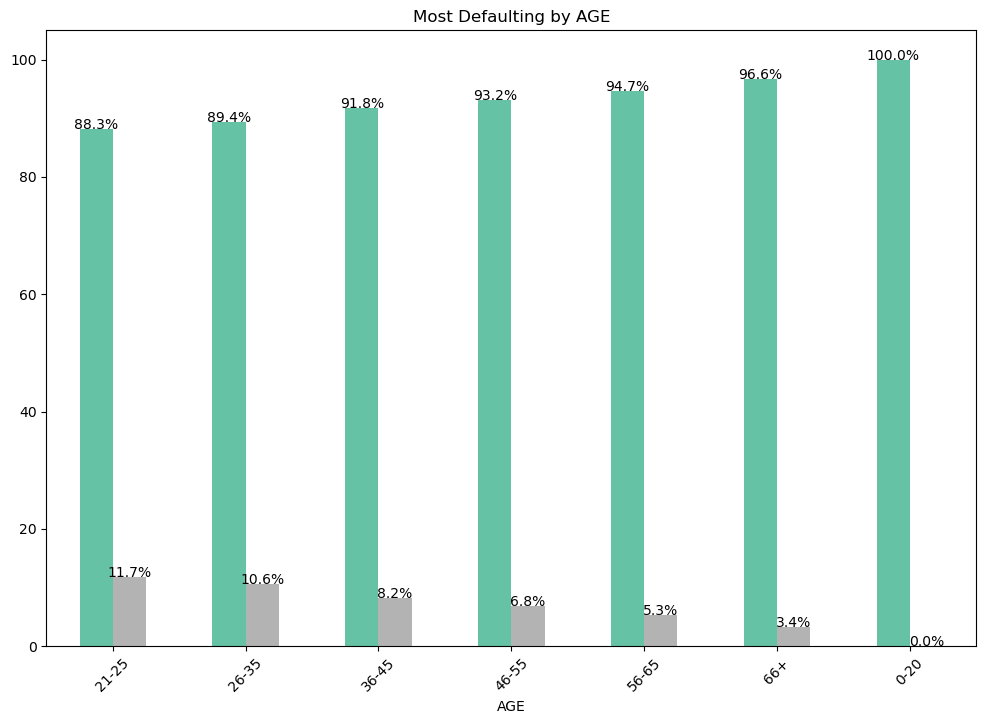

In [46]:
cat_vs_target(app_train, 'AGE')

for ages above 20, the older a client is, the lower the risk of defaulting.

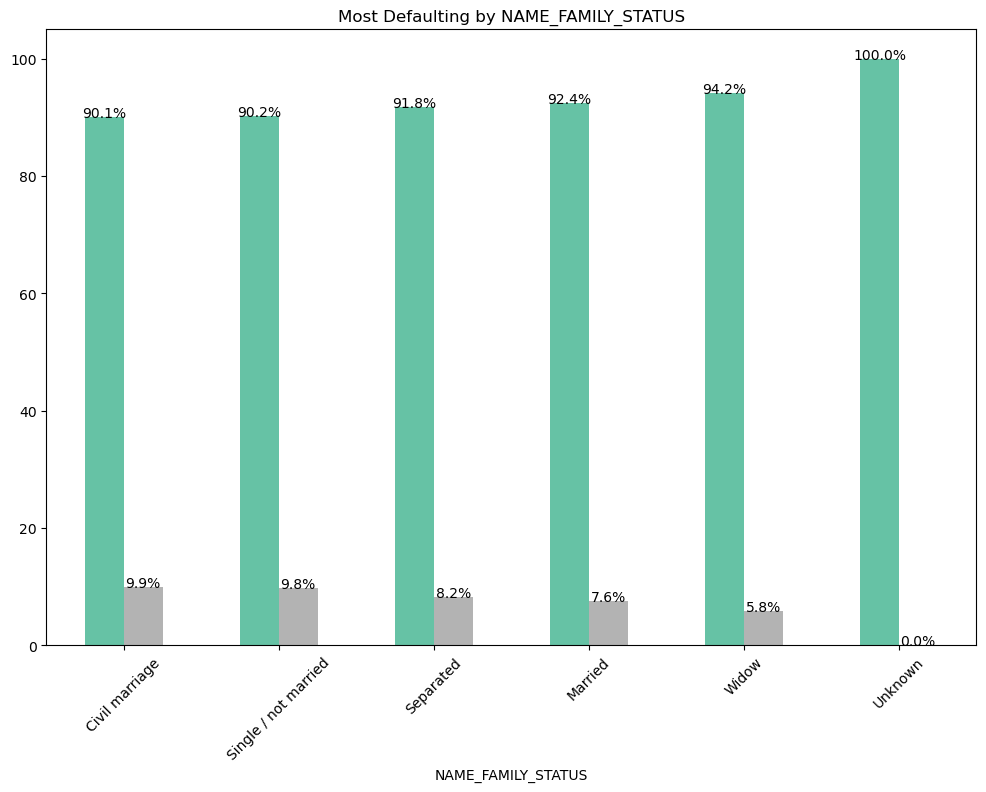

In [47]:
cat_vs_target(app_train,'NAME_FAMILY_STATUS')

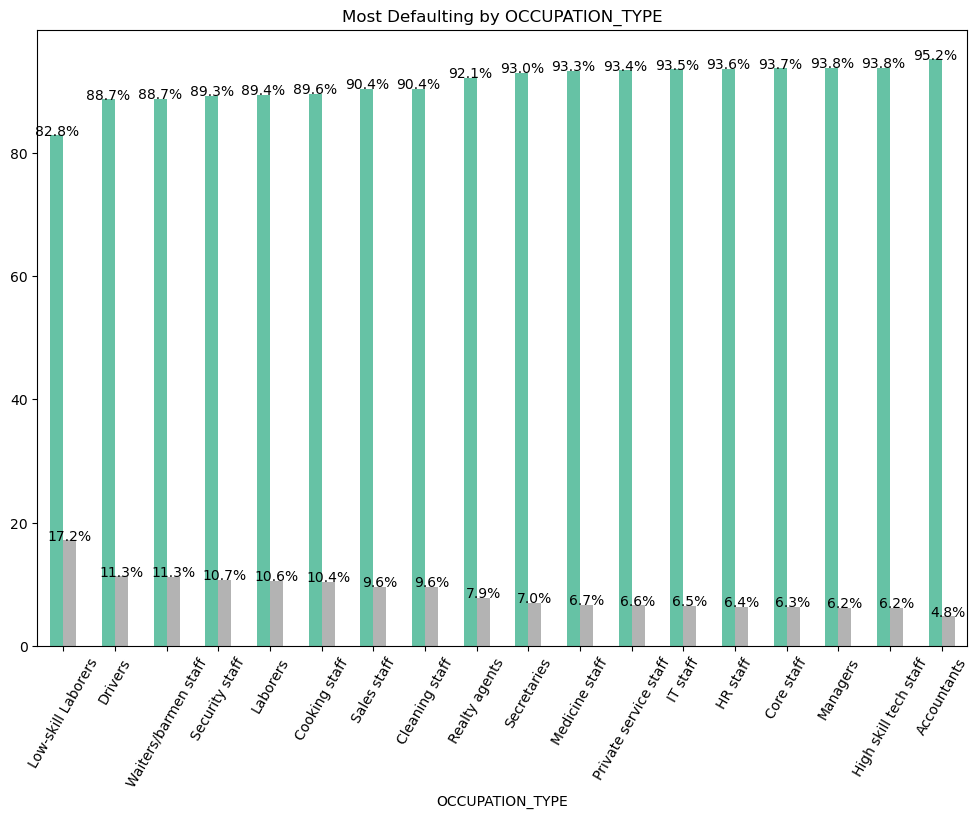

In [48]:
temp = app_train.groupby('OCCUPATION_TYPE')["TARGET"].value_counts(normalize=True).unstack().fillna(0) * 100

# Sort by the highest percentage of 'NO'
temp = temp.sort_values(by=1, ascending=False)

# Create a bar plo
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size
temp.plot(kind='bar', stacked=False, colormap='Set2', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.get_legend().remove()


# Set labels and title
plt.title('Most Defaulting by OCCUPATION_TYPE')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height), ha='center')

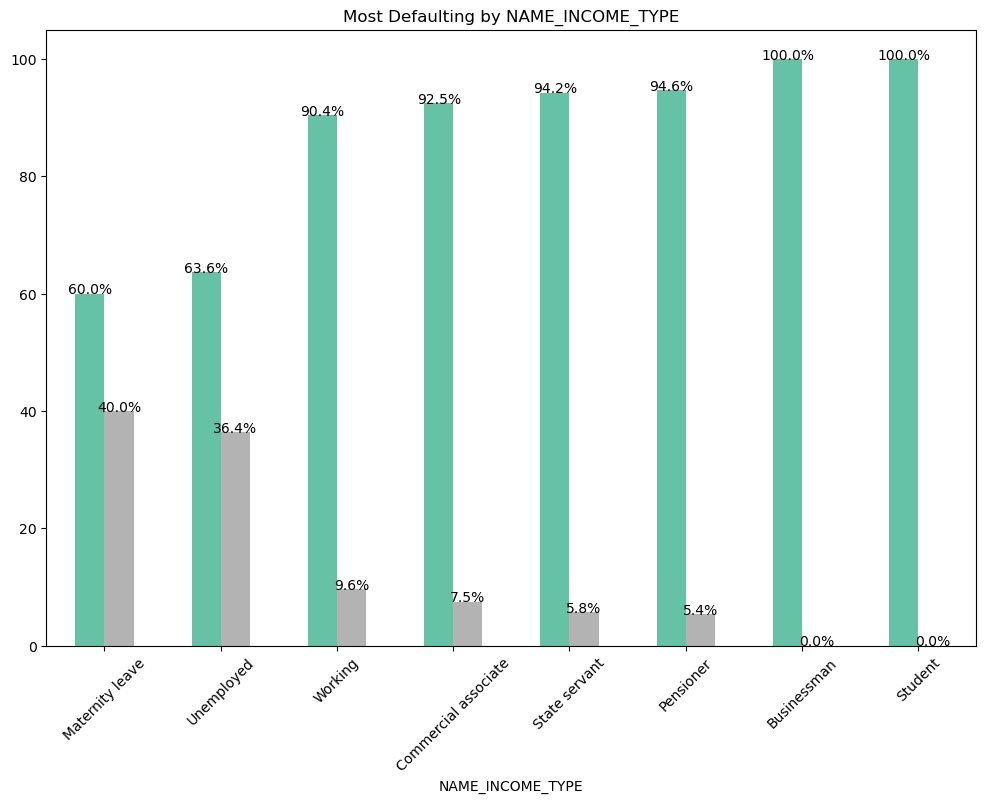

In [49]:
cat_vs_target(app_train,'NAME_INCOME_TYPE')

We can see that as expected, unemployed people default 36% of the time. What's more interesting is that females in a maternity leave tend to default the most with 40%. Interesting!

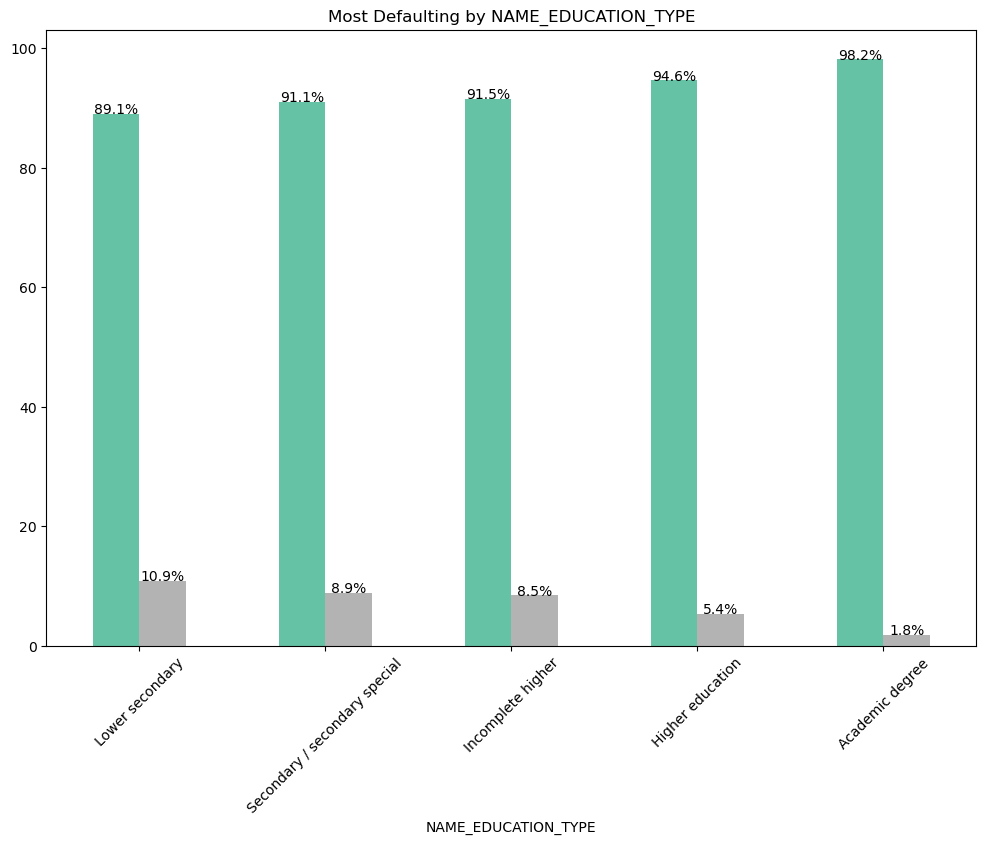

In [50]:
cat_vs_target(app_train,'NAME_EDUCATION_TYPE')

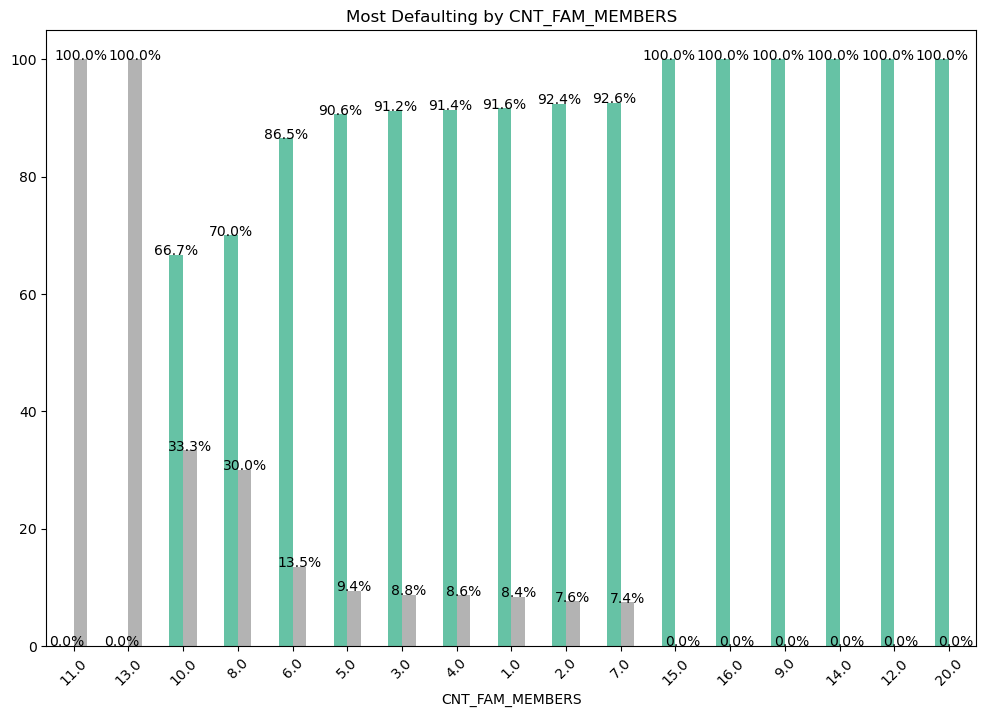

In [51]:
cat_vs_target(app_train,'CNT_FAM_MEMBERS')

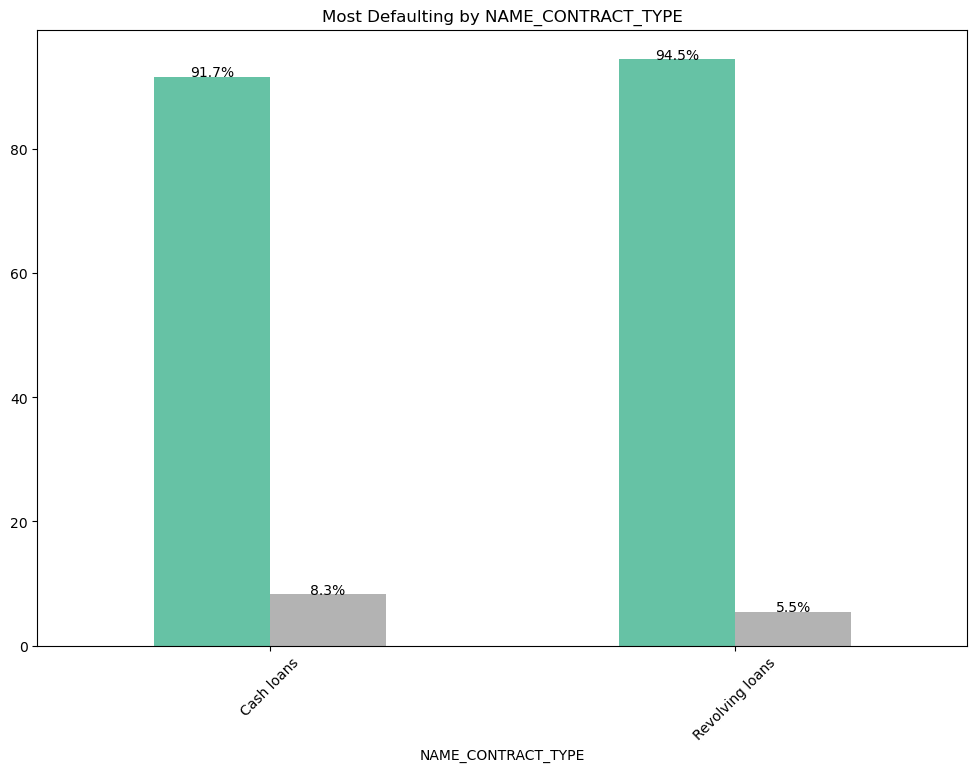

In [52]:
cat_vs_target(app_train,'NAME_CONTRACT_TYPE')

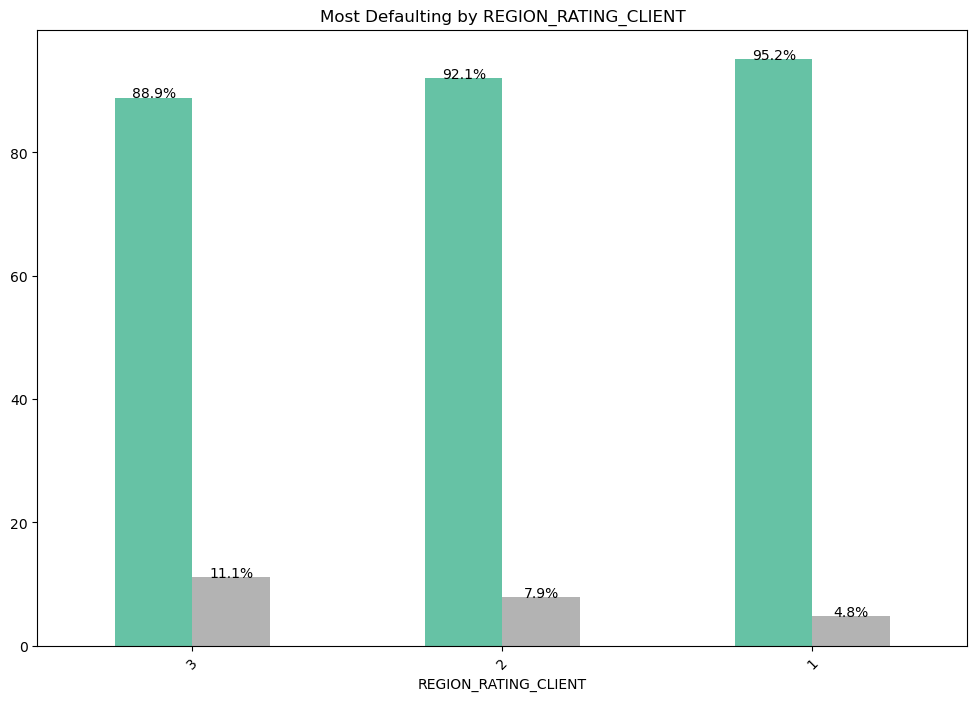

In [53]:
cat_vs_target(app_train,'REGION_RATING_CLIENT')

Indeed the class of the region the client lives in matters.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='OWN_CAR_AGE', ylabel='Count'>

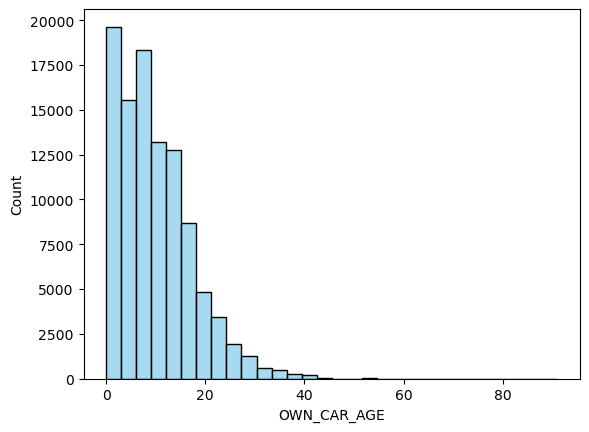

In [54]:
sns.histplot(app_train["OWN_CAR_AGE"], color="skyblue", bins=30)

/var/folders/lh/gq52fc897bz_4kb22zd34wch0000gp/T/ipykernel_52389/2185684332.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



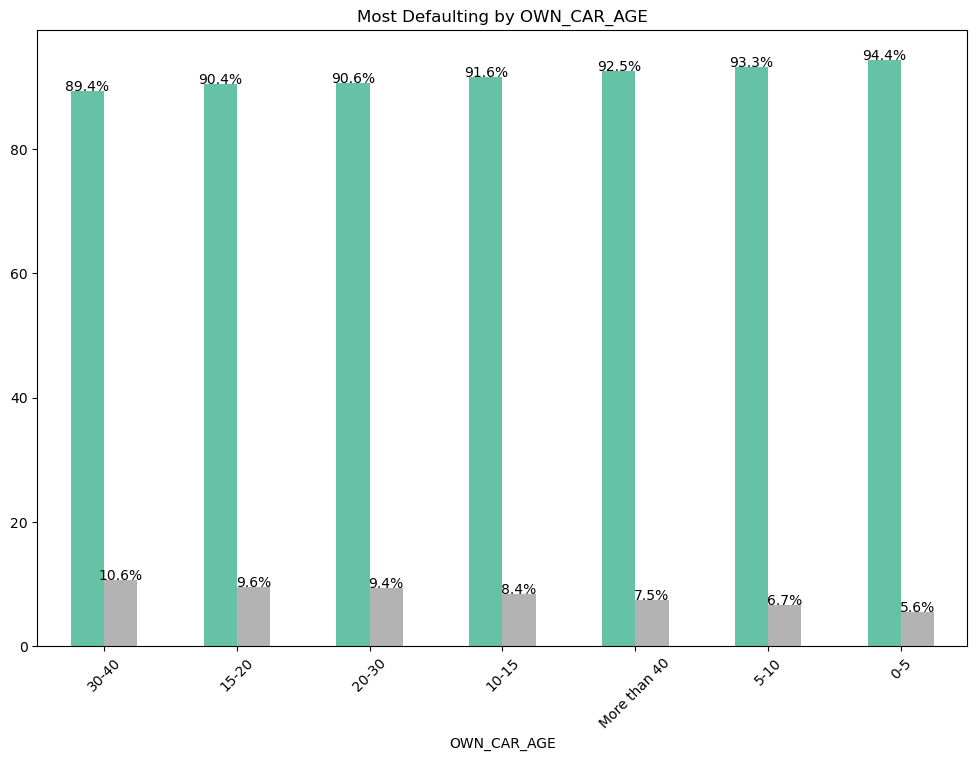

In [55]:
bin_edges = [0,6,11,16,21,31,41,100]
bin_labels = ['0-5','5-10','10-15','15-20','20-30','30-40','More than 40']
app_train['OWN_CAR_AGE'] = pd.cut(app_train['OWN_CAR_AGE'], bins=bin_edges, labels=bin_labels)
app_test['OWN_CAR_AGE'] = pd.cut(app_test['OWN_CAR_AGE'], bins=bin_edges, labels=bin_labels)

cat_vs_target(app_train,'OWN_CAR_AGE')

Clients with the newest cars default the least.

In [56]:
def bad_cols(df, threshold=0.5):
   
    missing_data = df.isnull().mean()
    return missing_data[missing_data > threshold].index.tolist()

bad_cols(app_train)

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [57]:
def col_segment(df):
    cat_cols = []
    label_cols = []
    ohe_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'category' :
            cat_cols.append(col)
        elif df[col].nunique() < 3:
            label_cols.append(col)
        else:
            ohe_cols.append(col)
            
    return cat_cols,label_cols,ohe_cols

In [58]:
cat_cols,label_cols,ohe_cols = col_segment(app_train)

In [59]:
imputer = SimpleImputer(strategy = 'median')

label_cols.remove('TARGET')

app_prep = pd.get_dummies(app_train, columns=cat_cols)
app_test1 = pd.get_dummies(app_test, columns=cat_cols)

label_encoder = LabelEncoder()

for col in label_cols:
    label_encoder.fit(app_prep[col])
    app_prep[col] = label_encoder.transform(app_prep[col])
    app_test1[col] = label_encoder.transform(app_test1[col])

scaler = MinMaxScaler()
scaler.fit(app_prep[ohe_cols])
app_prep[ohe_cols] = scaler.transform(app_prep[ohe_cols])
app_test1[ohe_cols] = scaler.transform(app_test1[ohe_cols])

In [60]:
float64_columns = app_prep.select_dtypes(include=['float64']).columns
app_prep[float64_columns] = app_prep[float64_columns].astype('float32')

int64_columns = app_prep.select_dtypes(include=['int64']).columns
app_prep[int64_columns] = app_prep[int64_columns].astype('int32')

float64_columns = app_test1.select_dtypes(include=['float64']).columns
app_test1[float64_columns] = app_test1[float64_columns].astype('float32')

int64_columns = app_test1.select_dtypes(include=['int64']).columns
app_test1[int64_columns] = app_test1[int64_columns].astype('int32')

In [61]:
app_prep, app_test1 = app_prep.align(app_test1, join = 'inner', axis = 1)

trainf= app_prep.copy()
testf= app_test.copy()
print( app_prep.shape)
print( app_test1.shape)

(307511, 253)
(48744, 253)


In [62]:
app_prep = imputer.fit_transform(app_prep)
app_test1 = imputer.transform(app_test1)

In [63]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(app_prep, app_train['TARGET'])

LogisticRegression(C=0.0001)

In [64]:
log_reg_pred = log_reg.predict_proba(app_test1)[:, 1]


In [65]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

/var/folders/lh/gq52fc897bz_4kb22zd34wch0000gp/T/ipykernel_52389/3970473317.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SK_ID_CURR,TARGET
0,100001,0.062484
1,100005,0.112534
2,100013,0.062472
3,100028,0.070939
4,100038,0.126520


In [66]:
feature_importances = log_reg.coef_[0]

feature_names = trainf.columns

sorted_indices = np.argsort(np.abs(feature_importances))[::-1]
top_features = sorted_indices[:100]

for index in top_features:
    feature_name = feature_names[index]
    importance = feature_importances[index]
    print(f"Feature Name: {feature_name}, Importance: {importance}")

Feature Name: EXT_SOURCE_2, Importance: -0.2371459600325503
Feature Name: EXT_SOURCE_3, Importance: -0.21881520331945742
Feature Name: NAME_EDUCATION_TYPE_Higher education, Importance: -0.10100606393622608
Feature Name: CODE_GENDER_F, Importance: -0.09338303656582964
Feature Name: CODE_GENDER_M, Importance: 0.0932898865840589
Feature Name: NAME_EDUCATION_TYPE_Secondary / secondary special, Importance: 0.09024586554910699
Feature Name: AGE_26-35, Importance: 0.08768710348080463
Feature Name: NAME_INCOME_TYPE_Working, Importance: 0.08308407521042868
Feature Name: EXT_SOURCE_1, Importance: -0.08237771430444152
Feature Name: FLAG_DOCUMENT_3, Importance: 0.07914473836290538
Feature Name: REGION_RATING_CLIENT_W_CITY, Importance: 0.07823352287425145
Feature Name: REGION_RATING_CLIENT, Importance: 0.07672479665112125
Feature Name: FLAG_OWN_CAR, Importance: -0.07462659910284675
Feature Name: DAYS_BIRTH, Importance: 0.07410935578352766
Feature Name: DAYS_LAST_PHONE_CHANGE, Importance: 0.06887006

Our initial thought is to use this as a helper to drop some features as we can't deal or optimize 122 features. Also, these features are not all important for prediction and will prevent us from focusing on the important features here. So, we will use our domain knowledge and the feature importance to drop unimportant features.

In [67]:
common_columns = []
counter = 0
top_fets = top_features[0:100]
top_feat_names = [feature_names[index] for index in top_fets]
col_names = app_train.columns.tolist()
for col1 in col_names:
    for col2 in top_feat_names:
        if col1 in col2:
            common_columns.append(col1)
            counter+=1

print("Common Columns:", common_columns)
counter

Common Columns: ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_HOUSING_TYPE', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OWN_CAR_AGE', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROC

104

In [68]:
len(set(common_columns))

58

In [69]:
common_columns = set(common_columns)
common_columns = list(common_columns)
len(common_columns)

58

We will try taking these columns only and will try to work our way from there towards a better, more focused model.

In [70]:
train_2 = pd.DataFrame()
test_2 = pd.DataFrame()
train_2['SK_ID_CURR'] = app_train['SK_ID_CURR']
train_2['TARGET'] = app_train['TARGET']
train_2[common_columns] = app_train[common_columns]
test_2['SK_ID_CURR'] = app_test['SK_ID_CURR']
test_2[common_columns] = app_test[common_columns]

print(app_train.shape)
print(app_test.shape)

(307511, 123)
(48744, 122)


In [71]:
train_2.head()

,SK_ID_CURR,TARGET,NAME_TYPE_SUITE,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_GOODS_PRICE,APARTMENTS_MODE,NAME_CONTRACT_TYPE,...,EXT_SOURCE_3,FLOORSMIN_MODE,EXT_SOURCE_1,FLAG_PHONE,APARTMENTS_MEDI,LIVINGAREA_AVG,CODE_GENDER,FLOORSMIN_AVG,FLAG_OWN_CAR,NAME_FAMILY_STATUS
0,100002,1,Unaccompanied,10,0.018801,"Stone, brick",No,351000.0,0.0252,Cash loans,...,0.139376,0.1250,0.083037,1,0.0250,0.0190,M,0.1250,0,Single / not married
1,100003,0,Family,11,0.003541,Block,No,1129500.0,0.0924,Cash loans,...,NaN,0.3333,0.311267,1,0.0968,0.0549,F,0.3333,0,Married
2,100004,0,Unaccompanied,9,0.010032,NaN,NaN,135000.0,NaN,Revolving loans,...,0.729567,NaN,NaN,1,NaN,NaN,M,NaN,1,Single / not married
3,100006,0,Unaccompanied,17,0.008019,NaN,NaN,297000.0,NaN,Cash loans,...,NaN,NaN,NaN,0,NaN,NaN,F,NaN,0,Civil marriage
4,100007,0,Unaccompanied,11,0.028663,NaN,NaN,513000.0,NaN,Cash loans,...,NaN,NaN,NaN,0,NaN,NaN,M,NaN,0,Single / not married


In [72]:
info(train_2)

Column "NAME_TYPE_SUITE" has 0.42% missing
Column "WALLSMATERIAL_MODE" has 50.84% missing
Column "EMERGENCYSTATE_MODE" has 47.40% missing
Column "AMT_GOODS_PRICE" has 0.09% missing
Column "APARTMENTS_MODE" has 50.75% missing
Column "LIVINGAREA_MODE" has 50.19% missing
Column "FONDKAPREMONT_MODE" has 68.39% missing
Column "DAYS_LAST_PHONE_CHANGE" has 0.00% missing
Column "OWN_CAR_AGE" has 67.77% missing
Column "ELEVATORS_MEDI" has 53.30% missing
Column "TOTALAREA_MODE" has 48.27% missing
Column "FLOORSMAX_AVG" has 49.76% missing
Column "DAYS_EMPLOYED" has 18.01% missing
Column "ELEVATORS_AVG" has 53.30% missing
Column "ELEVATORS_MODE" has 53.30% missing
Column "FLOORSMAX_MEDI" has 49.76% missing
Column "EXT_SOURCE_2" has 0.21% missing
Column "HOUSETYPE_MODE" has 50.18% missing
Column "LIVINGAREA_MEDI" has 50.19% missing
Column "FLOORSMAX_MODE" has 49.76% missing
Column "OCCUPATION_TYPE" has 31.35% missing
Column "APARTMENTS_AVG" has 50.75% missing
Column "FLOORSMIN_MEDI" has 67.85% miss

Now we will try XGBoost with our current data to see where it might take us, just as an indicator of how it can perform. But first we will need to do some preparations on the data.

In [73]:
temp = train_2['TARGET']
temp1 = train_2['SK_ID_CURR']
temp2 = test_2['SK_ID_CURR']
train_2 = train_2.drop(columns=['TARGET','SK_ID_CURR'])
cat_cols,label_cols,ohe_cols = col_segment(train_2)
print(cat_cols)
print(label_cols)
print(ohe_cols)

['NAME_TYPE_SUITE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'FONDKAPREMONT_MODE', 'OWN_CAR_AGE', 'AGE', 'NAME_INCOME_TYPE', 'HOUSETYPE_MODE', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS']
['FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_16', 'FLAG_OWN_REALTY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_WORK_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_OWN_CAR']
['HOUR_APPR_PROCESS_START', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'APARTMENTS_MODE', 'REGION_RATING_CLIENT', 'LIVINGAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'ELEVATORS_MEDI', 'TOTALAREA_MODE', 'FLOORSMAX_AVG', 'DAYS_EMPLOYED', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMAX_MEDI', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'AMT_CREDIT', 'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'DAYS_BIRTH', 'APARTMENTS_AVG', 

In [74]:
train_2_prep = pd.get_dummies(train_2, columns=cat_cols)
test_2_prep = pd.get_dummies(test_2, columns=cat_cols)
for col in label_cols:
    label_encoder.fit(train_2_prep[col])
    train_2_prep[col] = label_encoder.transform(train_2_prep[col])
    test_2_prep[col] = label_encoder.transform(test_2_prep[col])

In [75]:
train_2_prep['SK_ID_CURR'] = temp1
test_2_prep['SK_ID_CURR'] = temp2
train_2_prep,test_2_prep = train_2_prep.align(test_2_prep, join = 'inner', axis = 1)

0.7566 on training and it scored 0.737 on Kaggle. Way to go !

In [76]:
print(train_2.shape)
print(test_2.shape)


(307511, 58)
(48744, 59)


In [77]:
train_2.head()

,NAME_TYPE_SUITE,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_GOODS_PRICE,APARTMENTS_MODE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,...,EXT_SOURCE_3,FLOORSMIN_MODE,EXT_SOURCE_1,FLAG_PHONE,APARTMENTS_MEDI,LIVINGAREA_AVG,CODE_GENDER,FLOORSMIN_AVG,FLAG_OWN_CAR,NAME_FAMILY_STATUS
0,Unaccompanied,10,0.018801,"Stone, brick",No,351000.0,0.0252,Cash loans,House / apartment,2,...,0.139376,0.1250,0.083037,1,0.0250,0.0190,M,0.1250,0,Single / not married
1,Family,11,0.003541,Block,No,1129500.0,0.0924,Cash loans,House / apartment,1,...,NaN,0.3333,0.311267,1,0.0968,0.0549,F,0.3333,0,Married
2,Unaccompanied,9,0.010032,NaN,NaN,135000.0,NaN,Revolving loans,House / apartment,2,...,0.729567,NaN,NaN,1,NaN,NaN,M,NaN,1,Single / not married
3,Unaccompanied,17,0.008019,NaN,NaN,297000.0,NaN,Cash loans,House / apartment,2,...,NaN,NaN,NaN,0,NaN,NaN,F,NaN,0,Civil marriage
4,Unaccompanied,11,0.028663,NaN,NaN,513000.0,NaN,Cash loans,House / apartment,2,...,NaN,NaN,NaN,0,NaN,NaN,M,NaN,0,Single / not married


In [78]:
train_2['SK_ID_CURR'] = temp1
train_2.head()

,NAME_TYPE_SUITE,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_GOODS_PRICE,APARTMENTS_MODE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,...,FLOORSMIN_MODE,EXT_SOURCE_1,FLAG_PHONE,APARTMENTS_MEDI,LIVINGAREA_AVG,CODE_GENDER,FLOORSMIN_AVG,FLAG_OWN_CAR,NAME_FAMILY_STATUS,SK_ID_CURR
0,Unaccompanied,10,0.018801,"Stone, brick",No,351000.0,0.0252,Cash loans,House / apartment,2,...,0.1250,0.083037,1,0.0250,0.0190,M,0.1250,0,Single / not married,100002
1,Family,11,0.003541,Block,No,1129500.0,0.0924,Cash loans,House / apartment,1,...,0.3333,0.311267,1,0.0968,0.0549,F,0.3333,0,Married,100003
2,Unaccompanied,9,0.010032,NaN,NaN,135000.0,NaN,Revolving loans,House / apartment,2,...,NaN,NaN,1,NaN,NaN,M,NaN,1,Single / not married,100004
3,Unaccompanied,17,0.008019,NaN,NaN,297000.0,NaN,Cash loans,House / apartment,2,...,NaN,NaN,0,NaN,NaN,F,NaN,0,Civil marriage,100006
4,Unaccompanied,11,0.028663,NaN,NaN,513000.0,NaN,Cash loans,House / apartment,2,...,NaN,NaN,0,NaN,NaN,M,NaN,0,Single / not married,100007


Since logistic regression removed some numerical values that we perceive are important for our feature engineering stage, we will make sure to add them again.

In [79]:
train_2['AMT_INCOME_TOTAL'] = app_train['AMT_INCOME_TOTAL']
test_2['AMT_INCOME_TOTAL'] = app_test['AMT_INCOME_TOTAL']
train_2['AMT_ANNUITY'] = app_train['AMT_ANNUITY']
test_2['AMT_ANNUITY'] = app_test['AMT_ANNUITY']

In [80]:
train_2['ANNUITY_PERCENT'] = train_2['AMT_ANNUITY'] / train_2['AMT_INCOME_TOTAL'] *100
test_2['ANNUITY_PERCENT'] = test_2['AMT_ANNUITY'] / test_2['AMT_INCOME_TOTAL'] *100

Since the annuity is the annual amount paid in debt to the lending institution. We assume that its amount from the total annual income of the person must matter.

In [81]:
train_2['DTI'] = train_2['AMT_CREDIT'] / train_2['AMT_INCOME_TOTAL'] *100
test_2['DTI'] = test_2['AMT_CREDIT'] / test_2['AMT_INCOME_TOTAL'] *100

This is the Debt to Income ratio (DTI) and it's commonly used to determine the ability of a customer to pay his loan. The lower the better

In [82]:
train_2['CTA'] = train_2['AMT_CREDIT'] / train_2['AMT_ANNUITY']
test_2['CTA'] = test_2['AMT_CREDIT'] / test_2['AMT_ANNUITY']

CTA is credit to annuity ratio which means how many times the annuity can cover the credit. The higher the better.

In [83]:
low = ['Lower secondary']
high = ['Academic degree','Higher education']
train_2['NAME_EDUCATION_TYPE'] = train_2['NAME_EDUCATION_TYPE'].apply(
    lambda x: 'High' if x in high else ('Low' if x in low else 'Mid'))
test_2['NAME_EDUCATION_TYPE'] = test_2['NAME_EDUCATION_TYPE'].apply(
    lambda x: 'High' if x in high else ('Low' if x in low else 'Mid'))

In [84]:
high =['Unemployed','Maternity leave']
low =['Pension', 'State servant', 'Commercial associate']
vlow = ['Student','Businessman']

train_2['NAME_INCOME_TYPE'] = train_2['NAME_INCOME_TYPE'].apply(
    lambda x: 'Not working' if x in high else ('State related' if x in low else
                                              ('Low defaults' if x in vlow else x)) )

test_2['NAME_INCOME_TYPE'] = test_2['NAME_INCOME_TYPE'].apply(
    lambda x: 'Not working' if x in high else ('State related' if x in low else
                                              ('Low defaults' if x in vlow else x)) )

The low number of some income type entries here might give us a wrong indication about the behaviour of the category becuase we have no enough entries as we have <20 entries in businessman, student, unemployed and maternity leave. But we choose to go ahead as it's still an indication.

In [85]:
high = ['Laborers','Drivers','Low-skill laborers','Waiters/barmen staff','Security staff','Cooking staff']
medium = ['Realty agents','Sales staff', 'Cleaning staff']

train_2['OCCUPATION_TYPE'] = train_2['OCCUPATION_TYPE'].apply(
    lambda x: 'High risk' if x in high else ('Medium risk' if x in medium else 'Low risk'))

test_2['OCCUPATION_TYPE'] = test_2['OCCUPATION_TYPE'].apply(
    lambda x: 'High risk' if x in high else ('Medium risk' if x in medium else 'Low risk'))

In [86]:
high = ['Civil marriage', 'Single / not married']
medium = ['Separated','Married']

train_2['NAME_FAMILY_STATUS'] = train_2['NAME_FAMILY_STATUS'].apply(
    lambda x: 'High risk' if x in high else ('Medium risk' if x in medium else 'Low risk'))
test_2['NAME_FAMILY_STATUS'] = test_2['NAME_FAMILY_STATUS'].apply(
    lambda x: 'High risk' if x in high else ('Medium risk' if x in medium else 'Low risk'))

In [87]:
train_2['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Low risk       182201
High risk       87804
Medium risk     37506
Name: count, dtype: int64

In [88]:
from scipy import stats

train_2['TARGET'] = app_train['TARGET']
group_0 = train_2[train_2['TARGET'] == 0]['DAYS_EMPLOYED']
group_1 = train_2[train_2['TARGET'] == 1]['DAYS_EMPLOYED']

group_0 = group_0.dropna()
group_1 = group_1.dropna()

t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)
train_2 = train_2.drop(columns='TARGET')

T-statistic: -46.30593671197632
P-value: 0.0


We conduct a Welch T-Test as we have different sample sizes. We conduct the T-Test to check whether the mean days of employment for customers who defaulted is different from the mean for the customers who didn't. With this T-score, we can safely say that there's a significant difference and p-value is not actually zero here it's a very small number that has been approximated to zero by python.

In [89]:
train_2['EMPLOYED_MEAN'] = train_2['DAYS_EMPLOYED'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

test_2['EMPLOYED_MEAN'] = test_2['DAYS_EMPLOYED'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

We do the same T-Test with all the upcoming columns that contain days.

In [90]:
train_2['ID_MEAN'] = train_2['DAYS_ID_PUBLISH'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

test_2['ID_MEAN'] = test_2['DAYS_ID_PUBLISH'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

train_2['REG_MEAN'] = train_2['DAYS_REGISTRATION'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

test_2['REG_MEAN'] = test_2['DAYS_REGISTRATION'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

train_2['PHONE_MEAN'] = train_2['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

test_2['PHONE_MEAN'] = test_2['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:\
                     1 if x > group_1.mean() else 0)

In [91]:
train_2['STATUS_CHANGE'] = train_2['PHONE_MEAN'] + train_2['REG_MEAN'] +\
train_2['EMPLOYED_MEAN'] + train_2['ID_MEAN'] 

test_2['STATUS_CHANGE'] = test_2['PHONE_MEAN'] + test_2['REG_MEAN'] +\
test_2['EMPLOYED_MEAN'] + test_2['ID_MEAN']

In [92]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [93]:
bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

In [94]:
bureau['CREDIT_ACTIVE'].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [95]:
agg_bureau = bureau.groupby('SK_ID_CURR').agg(
    num_active_loans=('CREDIT_ACTIVE', lambda x: (x == 'Active').sum()),
    sum_credit_prolong=('CNT_CREDIT_PROLONG', 'sum'),
    num_past_loans = ('CREDIT_ACTIVE','count'),
    avg_days_overdue = ('CREDIT_DAY_OVERDUE','mean'),
    total_credit_limit = ('AMT_CREDIT_SUM_LIMIT','sum'),
    avg_annuity = ('AMT_ANNUITY','mean')
)

agg_bureau.reset_index(inplace=True)
agg_bureau.head()

,SK_ID_CURR,num_active_loans,sum_credit_prolong,num_past_loans,avg_days_overdue,total_credit_limit,avg_annuity
0,100001,3,0,7,0.0,0.000,3545.357143
1,100002,2,0,8,0.0,31988.565,0.000000
2,100003,1,0,4,0.0,810000.000,NaN
3,100004,0,0,2,0.0,0.000,NaN
4,100005,2,0,3,0.0,0.000,1420.500000


In [96]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [97]:
pos.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [98]:
pos.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    9
dtype: int64

In [99]:
pos['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64

In [100]:
pos.query('SK_DPD >30')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2252,2562793,287880,-46,7.0,0.0,Active,1105,0
3022,1288636,304698,-47,24.0,11.0,Active,31,1
3507,1290101,322484,-37,6.0,0.0,Active,329,0
3996,2002705,413918,-48,6.0,0.0,Active,146,0
4438,1184431,369596,-44,6.0,0.0,Active,173,0
...,...,...,...,...,...,...,...,...
10001352,2700641,448867,-19,6.0,0.0,Active,843,0
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0


In [101]:
agg_pos = pos.groupby('SK_ID_CURR').agg(
    late_payment_freq = ('SK_DPD', lambda x: (x > 30).sum()),
    DPD_sum = ('SK_DPD','sum'),
    avg_installment_duration = ('CNT_INSTALMENT','mean'),
    max_installment_left = ('CNT_INSTALMENT_FUTURE','max'),
)

agg_pos.reset_index(inplace=True)
agg_pos.head()

,SK_ID_CURR,late_payment_freq,DPD_sum,avg_installment_duration,max_installment_left
0,100001,0,7,4.000000,4.0
1,100002,0,0,24.000000,24.0
2,100003,0,0,10.107143,12.0
3,100004,0,0,3.750000,4.0
4,100005,0,0,11.700000,12.0


In [102]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [103]:
credit_card.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    7
dtype: int64

In [104]:
agg_cc = credit_card.groupby('SK_ID_CURR').agg(
    avg_balance = ('AMT_BALANCE','mean'),
    atm_drawings=('AMT_DRAWINGS_ATM_CURRENT', 'sum'),
    pos_drawings =('AMT_DRAWINGS_POS_CURRENT', 'sum'),
    all_drawings = ('AMT_DRAWINGS_CURRENT','sum'),
    credit_limit=('AMT_CREDIT_LIMIT_ACTUAL','sum')
)
agg_cc['atm_drawings'] = agg_cc['atm_drawings'] / agg_cc['all_drawings']+0.001 *100
agg_cc['pos_drawings'] = agg_cc['pos_drawings'] / agg_cc['all_drawings']+0.001 *100
agg_cc['credit_usage'] = agg_cc['all_drawings'] / agg_cc['credit_limit']+0.001 *100

agg_cc.reset_index(inplace=True)
agg_cc.head()

,SK_ID_CURR,avg_balance,atm_drawings,pos_drawings,all_drawings,credit_limit,credit_usage
0,100006,0.000000,NaN,NaN,0.0,1620000,0.100000
1,100011,54482.111149,1.1,0.1,180000.0,12150000,0.114815
2,100013,18159.919219,1.1,0.1,571500.0,12645000,0.145196
3,100021,0.000000,NaN,NaN,0.0,11475000,0.100000
4,100023,0.000000,NaN,NaN,0.0,1080000,0.100000


In [105]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
prev_app.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [107]:
prev_app['NAME_YIELD_GROUP'].value_counts()

NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [108]:
prev_app['NAME_CLIENT_TYPE']= prev_app['NAME_CLIENT_TYPE'].apply(
    lambda x: np.nan if x == 'XNA' else x)
prev_app['NAME_YIELD_GROUP'] = prev_app['NAME_YIELD_GROUP'].apply(
    lambda x: np.nan if x == 'XNA' else x)

In [109]:
agg_pa = prev_app.groupby('SK_ID_CURR').agg(
    sum_credit_prev = ('AMT_CREDIT','sum'),
    app_min_credit = ('AMT_APPLICATION','sum'),
    down_pay = ('AMT_DOWN_PAYMENT','sum'),
    days_decision = ('DAYS_DECISION','max'),
    req_insurance = ('NFLAG_INSURED_ON_APPROVAL','sum')
)
agg_pa['app_min_credit'] = agg_pa['app_min_credit'] - agg_pa['sum_credit_prev']
agg_pa['downp_percent'] = agg_pa['down_pay'] / agg_pa['sum_credit_prev'] *100

agg_pa.reset_index(inplace=True)
agg_pa.head()

,SK_ID_CURR,sum_credit_prev,app_min_credit,down_pay,days_decision,req_insurance,downp_percent
0,100001,23787.0,1048.5,2520.0,-1740,0.0,10.594022
1,100002,179055.0,0.0,0.0,-606,0.0,0.000000
2,100003,1452573.0,-146263.5,6885.0,-746,2.0,0.473987
3,100004,20106.0,4176.0,4860.0,-815,0.0,24.171889
4,100005,40153.5,4464.0,4464.0,-315,0.0,11.117337


In [110]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [111]:
agg_inst = installments.groupby('SK_ID_CURR').agg(
    paid_on = ('DAYS_ENTRY_PAYMENT','mean'),
    pay_due = ('DAYS_INSTALMENT','mean'),
    amt_paid = ('AMT_PAYMENT','sum'),
    amt_due = ('AMT_INSTALMENT','sum')
)

agg_inst['amt_extra'] = agg_inst['amt_paid'] - agg_inst['amt_due']
agg_inst['days_delay'] = agg_inst['paid_on'] - agg_inst['pay_due']
agg_inst.drop(columns=['amt_paid','amt_due','pay_due','paid_on'], inplace=True)

agg_pa.reset_index(inplace=True)
agg_pa.head()

,index,SK_ID_CURR,sum_credit_prev,app_min_credit,down_pay,days_decision,req_insurance,downp_percent
0,0,100001,23787.0,1048.5,2520.0,-1740,0.0,10.594022
1,1,100002,179055.0,0.0,0.0,-606,0.0,0.000000
2,2,100003,1452573.0,-146263.5,6885.0,-746,2.0,0.473987
3,3,100004,20106.0,4176.0,4860.0,-815,0.0,24.171889
4,4,100005,40153.5,4464.0,4464.0,-315,0.0,11.117337


In [112]:
train_2 = train_2.merge(agg_bureau, on='SK_ID_CURR', how='left')
train_2 = train_2.merge(agg_pos, on='SK_ID_CURR', how='left')
train_2 = train_2.merge(agg_cc, on='SK_ID_CURR', how='left')
train_2 = train_2.merge(agg_pa, on='SK_ID_CURR', how='left')
train_2 = train_2.merge(agg_inst, on='SK_ID_CURR', how='left')


test_2 = test_2.merge(agg_bureau, on='SK_ID_CURR', how='left')
test_2 = test_2.merge(agg_pos, on='SK_ID_CURR', how='left')
test_2 = test_2.merge(agg_cc, on='SK_ID_CURR', how='left')
test_2 = test_2.merge(agg_pa, on='SK_ID_CURR', how='left')
test_2 = test_2.merge(agg_inst, on='SK_ID_CURR', how='left')

In [113]:
cat_cols,label_cols,ohe_cols = col_segment(train_2)
eng_train = pd.get_dummies(train_2, columns=cat_cols)
eng_test = pd.get_dummies(test_2, columns=cat_cols)
for col in label_cols:
    label_encoder.fit(train_2[col])
    eng_train[col] = label_encoder.transform(train_2[col])
    eng_test[col] = label_encoder.transform(test_2[col])

In [114]:
eng_train,eng_test = eng_train.align(eng_test, join = 'inner', axis = 1)

In [115]:
col_names=eng_train.columns

In [116]:
eng_train = eng_train.replace([np.inf, -np.inf], 1e9)
eng_test = eng_test.replace([np.inf, -np.inf], 1e9)

# Machine Learning:

In [117]:
model = xgb.XGBClassifier(
    n_estimators = 1000,  
    max_depth=3,       
    learning_rate=0.1, 
    objective='binary:logistic'  
)

# Train the model on your training data
model.fit(eng_train, app_train['TARGET'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
xgb_train_pred = model.predict_proba(eng_train)[:, 1]  
roc_score_xgb = roc_auc_score(app_train['TARGET'], xgb_train_pred)
roc_score_xgb

0.82065320690494

model with n-estimators 300 and max depth 5 Scored 0.761 on Kaggle and 0.824 on training. Not Bad ! Rank 4780/7700

model with n-estimators 500 and max depth 3 Scored 0.760 on Kaggle and 0.79 on training. We have reduced overfitting.

model with n estimators 1100 and max depth 3 scored 0.775 on Kaggle and 0.82 on training.

model with n estimators 1000 and max depth 3 scored 0.77506 on Kaggle and 0.82 on training.

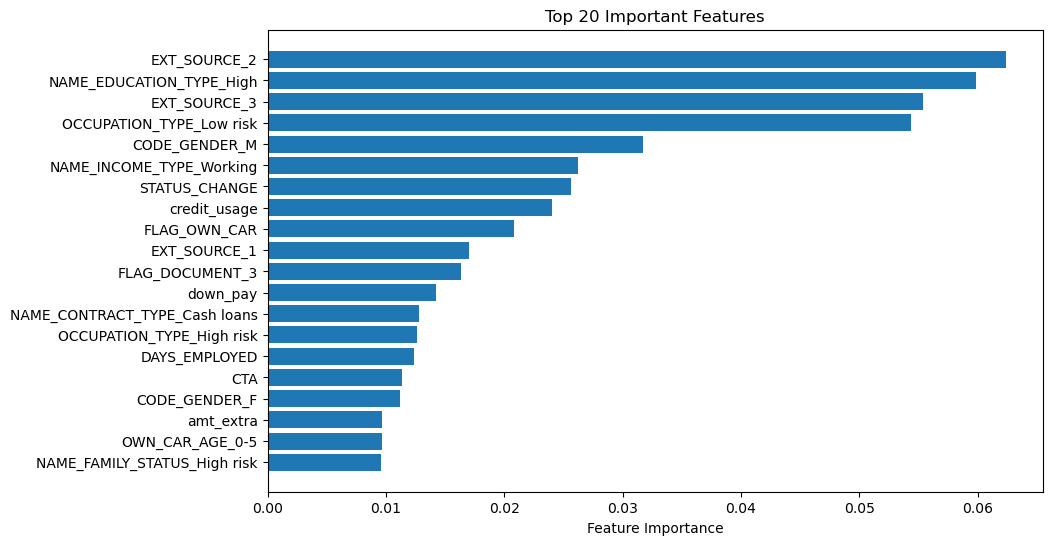

In [119]:
importances = model.feature_importances_

# Create a dataframe to store feature names and their importances
importance_df = pd.DataFrame({'Feature': col_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()

In [120]:
xgb_pred_test = model.predict_proba(eng_test)[:,1]

In [121]:
submit = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': xgb_pred_test})

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.028398
1,100005,0.082616
2,100013,0.033636
3,100028,0.036396
4,100038,0.104714


In [122]:
submit.to_csv('xgb_final.csv', index = False)